Name : Ameya Panshikar

PRN No: 240340128002


In [1]:
# Import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow as tf

In [2]:
# Parameters

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
EPOCHS = 100
# we are not defining alpha because it is predefined in the optimizer


TEST_SIZE = 0.2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_filename = os.path.join(r"/content/drive/MyDrive/Colab_Notebooks/train_clean.csv")
test_filename = os.path.join(r"/content/drive/MyDrive/Colab_Notebooks/test_clean.csv")

data_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/train_clean.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/test_clean.csv")

data_df.shape, test_df.shape

((891, 14), (418, 14))

In [5]:
data_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    object 
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    float64
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


There are null values in the Cabin column

In [29]:
# This is our target column (data_dfs last column)
data_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [8]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.445196,13.244896,0.42,22.0000,30.0000,35.5,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Family_Size,891.0,0.904602,1.613459,0.00,0.0000,0.0000,1.0,10.0000


In [9]:
for col in data_df.columns:
  print(f'col: {col} | {data_df[col].unique()}')

col: Age | [22.   38.   26.   35.   30.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   35.5  34.   15.   28.    8.   19.   40.   66.   42.
 21.   18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.
 32.   16.   25.    0.83 33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
col: Cabin | [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C12

In [10]:
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Survived']
data_df = data_df[selected_features]
data_df = pd.get_dummies(data_df, columns=['Sex', 'Embarked'], drop_first=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Survived    891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(3), int64(3)
memory usage: 44.5 KB


In [11]:
features_df = data_df[['Age','Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   Pclass      891 non-null    int64  
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 37.5 KB


In [12]:
label = data_df['Survived']
label

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

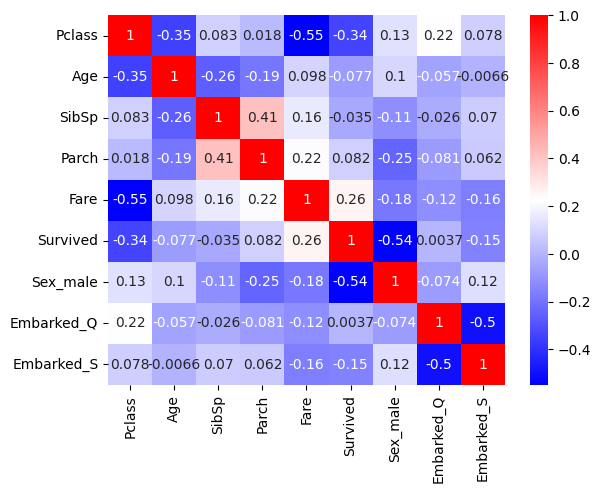

In [13]:
sns.heatmap(data_df.corr(), cmap = 'bwr', annot=True);

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features_df, label,
                                                    shuffle=True,
                                                    stratify = label,
                                                    test_size = TEST_SIZE,
                                                    random_state = RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [15]:
sc = StandardScaler()
le = LabelEncoder()

X_train = sc.fit_transform(X_train) # fit_transform on train
X_test = sc.transform(X_test)       # only transform on test


# le. and sc. always transform the data into numpy.ndarray thus typecasting it to numpy after encoding is not necessary
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
type(y_test)

numpy.ndarray

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(15, activation='relu',
                                kernel_regularizer = None))
model.add(tf.keras.layers.Dense(10, activation='relu',
                                kernel_regularizer = None))
model.add(tf.keras.layers.Dense(5, activation='relu',
                                kernel_regularizer = None))
model.add(tf.keras.layers.Dense(2))

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

model.compile(loss=loss_fn, optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=[X_test, y_test])

Epoch 1/100
23/23 [==============================] - 4s 26ms/step - loss: 0.6776 - accuracy: 0.6292 - val_loss: 0.6665 - val_accuracy: 0.6536
Epoch 2/100
23/23 [==============================] - 0s 12ms/step - loss: 0.6504 - accuracy: 0.6573 - val_loss: 0.6392 - val_accuracy: 0.6480
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6149 - accuracy: 0.6756 - val_loss: 0.6062 - val_accuracy: 0.6592
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.5782 - accuracy: 0.7037 - val_loss: 0.5759 - val_accuracy: 0.6927
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5471 - accuracy: 0.7275 - val_loss: 0.5538 - val_accuracy: 0.7318
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5214 - accuracy: 0.7486 - val_loss: 0.5344 - val_accuracy: 0.7821
Epoch 7/100
23/23 [==============================] - 0s 10ms/step - loss: 0.5008 - accuracy: 0.7851 - val_loss: 0.5180 - val_accuracy: 0.7933
Epoch 8/10

In [20]:
loss_df = pd.DataFrame(hist.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.677607,0.629214,0.666470,0.653631
1,0.650406,0.657303,0.639174,0.648045
2,0.614921,0.675562,0.606248,0.659218
3,0.578154,0.703652,0.575870,0.692737
4,0.547079,0.727528,0.553775,0.731844


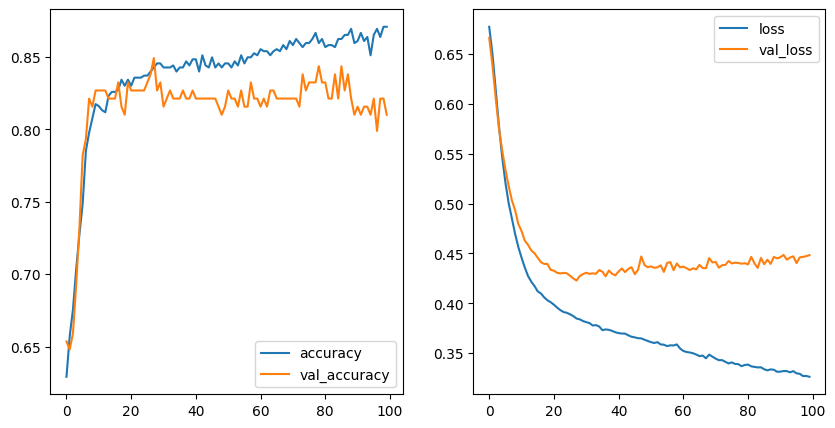

In [21]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
loss_df.plot(y=['accuracy', 'val_accuracy'], ax=axes[0])
loss_df.plot(y=['loss', 'val_loss'], ax=axes[1])
plt.show()

In [22]:
y_pred = model.predict(X_test)
y_pred.shape

6/6 [==============================] - 0s 3ms/step


(179, 2)

In [23]:
y_pred.argmax(axis=1)

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0])

In [24]:
accuracy_score(y_test, y_pred.argmax(axis=1))

0.8100558659217877

In [25]:
confusion_matrix(y_test, y_pred.argmax(axis=1))

array([[96, 14],
       [20, 49]])

In [26]:
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



**My observations of tuning different hyperparameters**


In [27]:
save = pd.DataFrame({'Survived':y_pred.argmax(axis=1)})
save.to_csv('Predictions.csv',index=False)

|#|Total hidden layers & dimensions|Learning rate|Test Accuracy|Activation function|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|2(10,5)|0.001|0.8405|ReLU|Base case|
|2|2(10,5)|0.001|0.8216|Sigmoid|Minor dip in the accuracy|
|3|2(10,5)|0.001|0.8324|Tanh|Better than sigmoid but not above ReLU|
|4|3(15,10,5)|0.1|0.8044|ReLU|Reducing the learning rate is giving messy loss and accuracy curves|
|5|3(15,10,5)|0.001|0.8100|ReLU|little overfitting observed|

**Thus we can see that more hidden layers with a similar alpha rate are mildly overfitting the data whereas optimum hidden layers and the numer of neurons are giving us the best results as in the base case**